In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from evaluation_metrics import get_file_and_dirnames, get_token_flags
from evaluation_metrics import get_metrics_for_multiple_sequences, summarize_evaluation_sequences

PATH_VOCAB = "../0_data/5_vocabs"
PATH_DATA = "../0_data/6_word_data"
PATH_MODELS = "../0_data/7_models"
PATH_MODELS_CONFIG = "../0_data/7_models/config"
PATH_PRED = "../0_data/8_predictions"
PATH_TOKENS = "../0_data/8_predictions/tokens"
PATH_MIDI = "../0_data/8_predictions/midi"

In [2]:
vocab_configs = {
    "a1" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "all",
    },
    "a2" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": True,
        "key": "all",
    },
    "a3" : {
        "pitch_range": 128,
        "duration_steps": 32,
        "triole_tokens": False,
        "key": "all",
    },
    "b" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "C",
    },
    "c" : {
        "pitch_range": 36,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "all",
    },
    "d" : {
        "pitch_range": 36,
        "duration_steps": 32,
        "triole_tokens": True,
        "key": "C",
    }
}

## Original Data

In [3]:
metric_original_data_dic = {}

for key in vocab_configs.keys():
    
    path = f"{PATH_DATA}/{key}_token_data.json"
    
    with open(path, "r") as fp:
        tokens = json.load(fp)
    token_data = [tokens[key] for key in tokens.keys()]

    token_flags = get_token_flags(vocab_configs[key])
    
    seq_metrics = get_metrics_for_multiple_sequences(token_data, token_flags)
    metrics = summarize_evaluation_sequences(seq_metrics)
    metric_original_data_dic[key] = metrics
    
metric_original_data_df = pd.DataFrame(metric_original_data_dic)
metric_original_data_df

,a1,a2,a3,b,c,d
mean_pitch,72.46,72.46,72.46,71.69,16.1,15.9
pitch_count_seq,11.45,11.45,11.45,11.31,11.19,11.04
pitch_count_bar,3.44,3.44,3.43,3.44,3.43,3.41
pitch_range_seq,18.49,18.49,18.49,18.5,17.99,17.98
pitch_range_bar,6.05,6.05,6.03,6.05,6.03,6.0
pitch_intervals_avg,0.01,0.01,0.01,0.01,0.01,0.01
pitch_intervals_avg_abs,2.4,2.4,2.38,2.4,2.39,2.39
pitch_intervals_hist,"[72599, 24891, 109685, 42472, 11620, 20318, 17...","[72599, 24891, 109685, 42472, 11620, 20318, 17...","[73971, 24890, 109687, 42472, 11621, 20319, 17...","[66573, 23161, 102725, 39778, 10810, 18821, 16...","[69361, 23377, 104381, 40565, 10902, 19328, 16...","[65103, 21371, 96282, 38016, 10573, 18469, 172..."
pitch_class_hist_numbers,"[26990, 22659, 28748, 24545, 27367, 25823, 237...","[26990, 22659, 28748, 24545, 27367, 25823, 237...","[27138, 22757, 28886, 24619, 27493, 25901, 238...","[52432, 1068, 49650, 912, 55359, 11314, 1268, ...","[25712, 21412, 27214, 23076, 26326, 24545, 226...","[49849, 948, 47530, 811, 52734, 10590, 1211, 4..."
pitch_class_hist_pitches,"{'C': 26990, 'C#': 22659, 'D': 28748, 'D#': 24...","{'C': 26990, 'C#': 22659, 'D': 28748, 'D#': 24...","{'C': 27138, 'C#': 22757, 'D': 28886, 'D#': 24...","{'C': 52432, 'C#': 1068, 'D': 49650, 'D#': 912...","{'C': 25712, 'C#': 21412, 'D': 27214, 'D#': 23...","{'C': 49849, 'C#': 948, 'D': 47530, 'D#': 811,..."


In [4]:
metric_original_data_df.to_excel(f"{PATH_PRED}/original_data_evaluation.xlsx")

## Hyperparameter Models

In [5]:
model_df = pd.read_excel(f"{PATH_MODELS}/model_stats.xlsx", index_col="Unnamed: 0")
model_df

,name,max_length,emb_dim,attention_heads,layers,dropout,learning_rate,epochs,batch_size,ran,runtime,runtime_min,min_loss,at_epoch,incorrect_notes,correct_notes,correct_rate
0,1_short_small_50,256,128,2,3,0.01,0.001,50,4,yes,185.6872,3.09,1.163706,50,0.0,65.8,1.00
1,2_short_medium_50,256,256,4,6,0.01,0.001,50,4,yes,286.7629,4.78,1.251897,24,0.2,70.4,1.00
2,3_short_large_50,256,512,8,12,0.01,0.001,50,4,yes,568.0452,9.47,1.973589,50,0.0,74.6,1.00
3,4_middle_small_50,1024,128,2,3,0.01,0.001,50,4,yes,248.7667,4.15,1.087204,50,0.0,264.8,1.00
4,5_middle_medium_50,1024,256,4,6,0.01,0.001,50,4,yes,628.1603,10.47,1.120312,40,0.2,265.6,1.00
5,6_middle_large_50,1024,512,8,12,0.01,0.001,50,4,yes,2247.7578,37.46,1.872430,48,0.4,289.8,1.00
6,7_long_small_50,2048,128,2,3,0.01,0.001,50,4,yes,491.8461,8.20,1.202734,50,1.6,546.8,1.00
7,8_long_medium_50,2048,256,4,6,0.01,0.001,50,4,yes,1506.3536,25.11,1.154148,37,2.8,526.8,0.99
8,9_long_large_50,2048,512,8,12,0.01,0.001,50,4,yes,5933.9392,98.90,1.284094,50,0.2,552.2,1.00
9,4_v1,1024,128,2,3,0.01,0.010,100,4,yes,489.4652,8.16,1.966235,91,0.2,253.4,1.00


In [6]:
metric_dic = {}

for index, row in model_df.iterrows():
    # only models that ran
    if row["ran"] == "no" or row["runtime"] == "too big - cuda error":
        continue

    model_name = row["name"]
    
    with open(f"{PATH_TOKENS}/{model_name}.json", "r") as fp:
        tokens = json.load(fp)
    token_data = tokens["data"]

    token_flags = get_token_flags(vocab_configs["d"])

    seq_metrics = get_metrics_for_multiple_sequences(token_data, token_flags)
    metrics = summarize_evaluation_sequences(seq_metrics)
    metric_dic[model_name] = metrics
    
metric_df = pd.DataFrame(metric_dic)
metric_df

,1_short_small_50,2_short_medium_50,3_short_large_50,4_middle_small_50,5_middle_medium_50,6_middle_large_50,7_long_small_50,8_long_medium_50,9_long_large_50,4_v1,...,4_v3,5_v1,5_v2,5_v3,7_v1,7_v2,7_v3,5_v3_b4,5_v3_b8,5_v3_b16
mean_pitch,11.25,17.4,13.85,16.47,15.74,15.78,13.5,14.24,16.92,15.0,...,16.15,14.28,14.04,17.08,15.53,16.04,13.65,16.18,15.13,16.05
pitch_count_seq,8.8,6.8,13.2,11.8,10.8,14.8,14.4,13.2,18.0,17.8,...,12.6,18.0,11.4,10.4,22.4,13.2,14.6,10.6,10.4,9.2
pitch_count_bar,3.4,3.19,4.07,3.09,3.5,3.52,3.4,2.78,3.61,3.97,...,3.81,3.7,3.61,3.79,4.31,3.16,2.79,3.88,4.01,3.06
pitch_range_seq,14.6,14.0,24.0,20.8,19.4,20.4,22.4,20.0,25.4,27.8,...,20.2,29.4,18.8,18.8,29.4,24.4,21.4,17.4,16.4,17.6
pitch_range_bar,5.52,5.69,10.25,5.37,6.5,7.31,6.25,5.07,6.6,10.61,...,6.79,8.67,6.67,6.99,10.35,5.66,5.01,6.98,6.71,5.43
pitch_intervals_avg,0.07,0.06,0.05,0.03,0.01,0.02,0.0,0.0,0.01,0.02,...,0.02,0.03,0.03,0.02,0.0,0.01,-0.0,0.03,0.01,0.02
pitch_intervals_avg_abs,2.17,2.19,5.48,2.25,2.52,4.54,2.88,2.76,2.77,5.95,...,1.96,5.42,2.38,2.14,5.62,2.46,2.4,2.26,2.06,2.4
pitch_intervals_hist,"[80, 35, 126, 32, 10, 23, 0, 12, 0, 6, 1, 0, 1...","[93, 16, 134, 53, 15, 20, 0, 11, 2, 4, 1, 0, 3...","[49, 8, 54, 31, 27, 57, 0, 46, 10, 27, 18, 4, ...","[358, 57, 456, 205, 61, 116, 0, 35, 8, 10, 9, ...","[282, 20, 543, 258, 23, 97, 0, 55, 9, 11, 7, 2...","[197, 37, 255, 163, 105, 226, 14, 209, 44, 77,...","[603, 157, 785, 375, 177, 309, 1, 180, 22, 57,...","[634, 49, 886, 435, 101, 240, 2, 171, 20, 39, ...","[624, 214, 803, 353, 183, 285, 13, 133, 24, 44...","[151, 32, 179, 122, 85, 182, 7, 125, 37, 76, 5...",...,"[444, 118, 466, 240, 43, 59, 1, 39, 3, 11, 6, ...","[143, 57, 213, 158, 99, 225, 12, 168, 51, 70, ...","[322, 83, 500, 198, 29, 74, 0, 75, 18, 21, 3, ...","[408, 69, 531, 219, 51, 78, 0, 65, 5, 13, 5, 0...","[290, 92, 432, 271, 201, 401, 30, 327, 92, 151...","[793, 121, 889, 328, 90, 259, 1, 126, 15, 34, ...","[883, 110, 869, 287, 116, 248, 1, 141, 27, 52,...","[324, 94, 491, 206, 56, 88, 0, 58, 7, 9, 2, 0,...","[376, 187, 487, 147, 67, 83, 1, 64, 12, 3, 6, ...","[278, 6, 634, 332, 46, 56, 0, 67, 3, 7, 3, 0, ..."
pitch_class_hist_numbers,"[66, 0, 59, 0, 52, 19, 0, 66, 0, 44, 0, 25]","[55, 0, 67, 0, 91, 13, 0, 65, 0, 62, 0, 4]","[67, 0, 66, 0, 85, 10, 0, 69, 0, 55, 0, 22]","[256, 3, 247, 0, 214, 4, 2, 206, 0, 287, 0, 107]","[183, 0, 260, 0, 264, 1, 0, 256, 0, 320, 0, 46]","[266, 2, 270, 2, 279, 55, 4, 255, 2, 238, 2, 76]","[502, 5, 533, 1, 490, 47, 50, 394, 0, 476, 0, ...","[362, 103, 520, 59, 458, 61, 8, 393, 81, 447, ...","[515, 15, 573, 20, 568, 114, 11, 362, 10, 403,...","[242, 0, 233, 0, 281, 40, 2, 180, 2, 208, 1, 79]",...,"[261, 15, 187, 13, 211, 89, 1, 304, 17, 265, 1...","[260, 1, 244, 2, 283, 55, 4, 240, 2, 243, 1, 100]","[236, 0, 279, 0, 262, 70, 0, 219, 1, 220, 1, 49]","[247, 0, 312, 0, 340, 29, 0, 264, 1, 210, 0, 52]","[522, 5, 481, 7, 581, 113, 16, 471, 9, 415, 4,...","[436, 1, 467, 4, 490, 17, 0, 446, 1, 731, 1, 132]","[484, 14, 507, 26, 707, 135, 22, 342, 85, 371,...","[235, 0, 240, 0, 313, 31, 0, 172, 1, 275, 0, 81]","[250, 0, 234, 0, 272, 55, 2, 192, 0, 257, 0, 179]","[229, 0, 314, 0, 427, 0, 0, 186, 0, 273, 0, 18]"
pitch_class_hist_pitches,"{'C': 66, 'C#': 0, 'D': 59, 'D#': 0, 'E': 52, ...","{'C': 55, 'C#': 0, 'D': 67, 'D#': 0, 'E': 91, ...","{'C': 67, 'C#': 0, 'D': 66, 'D#': 0, 'E': 85, ...","{'C': 256, 'C#': 3, 'D': 247, 'D#': 0, 'E': 21...","{'C': 183, 'C#': 0, 'D': 260, 'D#': 0, 'E': 26...","{'C': 266, 'C#': 2, 'D': 270, 'D#': 2, 'E': 27...","{'C': 502, 'C#': 5, 'D': 533, 'D#': 1, 'E': 49...","{'C': 362, 'C#': 103, 'D': 520, 'D#': 59, 'E':...","{'C': 515, 'C#': 15, 'D': 573, 'D#': 20, 'E': ...","{'C': 242, 'C#': 0, 'D': 233, 'D#': 0, 'E': 28...",...,"{'C': 261, 'C#': 15, 'D': 187, 'D#': 13, 'E': ...","{'C': 260, 'C#': 1, 'D': 244, 'D#': 2, 'E': 28...","{'C': 236, 'C#': 0, 'D': 279, 'D#': 0, 'E': 26...","{'C': 247, 'C#': 0, 'D': 312, 'D#': 0, 'E': 34...","{'C': 522, 'C#': 5, 'D': 481, 'D#': 7, 'E': 58...","{'C': 

In [7]:
metric_df.to_excel(f"{PATH_PRED}/model_evaluation.xlsx")

## Comparison Models

In [8]:
comparison_model_df = pd.read_excel(f"{PATH_MODELS}/comparison_model_stats.xlsx", index_col="Unnamed: 0")
comparison_model_df

,name,max_length,emb_dim,attention_heads,layers,dropout,learning_rate,epochs,batch_size,ran,runtime,runtime_min,min_loss,at_epoch,perplexity,incorrect_notes,correct_notes,correct_rate
0,a1,1024,256,4,6,0,0.001,50,4,yes,717.6662,11.96,1.373842,42,423.106567,0.26,322.08,1
1,a2,1024,256,4,6,0,0.001,50,4,yes,716.0189,11.93,1.140858,49,472.513916,0.28,280.23,1
2,a3,1024,256,4,6,0,0.001,50,4,yes,696.7114,11.61,1.342281,34,252.672455,0.14,320.89,1
3,b,1024,256,4,6,0,0.001,50,4,yes,636.9317,10.62,1.325169,27,306.182312,0.43,322.02,1
4,c,1024,256,4,6,0,0.001,50,4,yes,656.0490,10.93,1.362022,32,810.230347,0.34,321.72,1
5,d,1024,256,4,6,0,0.001,50,4,yes,598.8393,9.98,1.167735,50,486.180145,0.39,282.52,1


In [9]:
comp_metric_dic = {}

for index, row in comparison_model_df.iterrows():
    
    # only models that ran
    if row["ran"] == "no":
        continue

    model_name = row["name"]
    with open(f"{PATH_TOKENS}/{model_name}.json", "r") as fp:
        tokens = json.load(fp)
    token_data = tokens["data"]

    token_flags = get_token_flags(vocab_configs[model_name])
    seq_metrics = get_metrics_for_multiple_sequences(token_data, token_flags)
    metrics = summarize_evaluation_sequences(seq_metrics)
    comp_metric_dic[model_name] = metrics
    
comp_metric_df = pd.DataFrame(comp_metric_dic)
comp_metric_df

,a1,a2,a3,b,c,d
mean_pitch,72.11,70.84,71.98,70.0,15.63,15.18
pitch_count_seq,14.9,14.7,14.14,12.79,13.24,11.72
pitch_count_bar,3.41,3.44,3.31,3.4,3.34,3.38
pitch_range_seq,22.73,23.21,22.44,22.6,20.53,19.82
pitch_range_bar,5.91,5.97,5.72,5.96,5.7,5.95
pitch_intervals_avg,0.01,0.02,0.01,0.01,0.02,0.02
pitch_intervals_avg_abs,2.33,2.24,2.28,2.27,2.23,2.23
pitch_intervals_hist,"[8105, 2125, 11374, 4667, 1342, 2126, 47, 1288...","[7130, 2064, 10373, 3812, 1012, 1672, 41, 1124...","[7848, 2727, 11430, 4532, 1209, 2039, 81, 1157...","[7752, 2483, 11986, 4677, 1107, 1979, 21, 1175...","[8345, 2524, 11811, 4107, 1119, 1975, 40, 1245...","[7194, 2173, 9992, 4266, 965, 1743, 21, 1018, ..."
pitch_class_hist_numbers,"[2748, 2640, 2759, 2945, 2518, 2504, 2592, 345...","[2560, 1829, 2705, 2267, 2421, 2262, 2244, 279...","[2447, 2753, 3252, 2410, 2816, 2368, 2944, 285...","[5950, 90, 5389, 59, 5930, 1293, 76, 5590, 206...","[3082, 2234, 2974, 2675, 3054, 2863, 2433, 313...","[5548, 19, 4520, 24, 5151, 945, 31, 4855, 20, ..."
pitch_class_hist_pitches,"{'C': 2748, 'C#': 2640, 'D': 2759, 'D#': 2945,...","{'C': 2560, 'C#': 1829, 'D': 2705, 'D#': 2267,...","{'C': 2447, 'C#': 2753, 'D': 3252, 'D#': 2410,...","{'C': 5950, 'C#': 90, 'D': 5389, 'D#': 59, 'E'...","{'C': 3082, 'C#': 2234, 'D': 2974, 'D#': 2675,...","{'C': 5548, 'C#': 19, 'D': 4520, 'D#': 24, 'E'..."


In [10]:
comp_metric_df.to_excel(f"{PATH_PRED}/comparison_model_evaluation.xlsx")

# Compare Evaluation

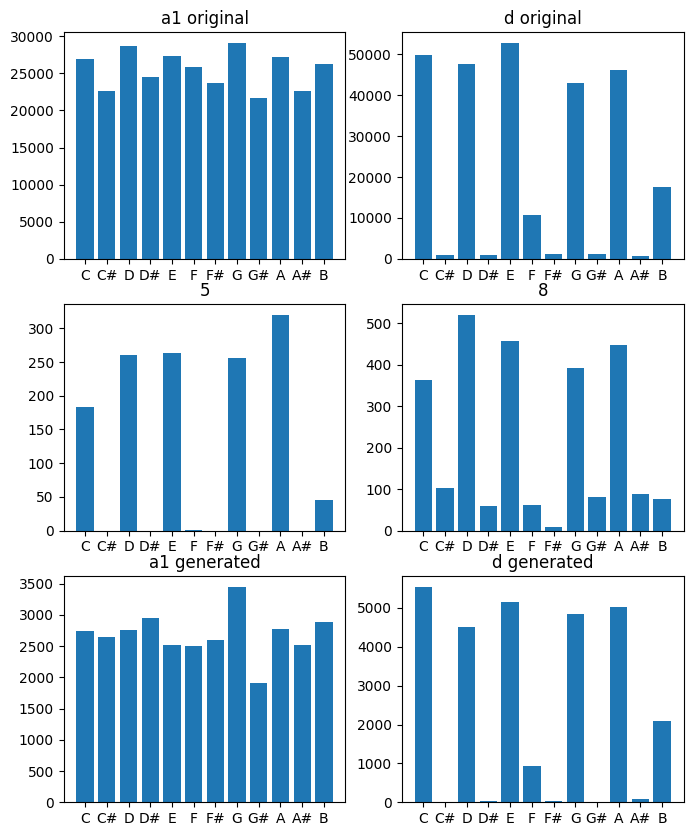

In [11]:
figure, axis = plt.subplots(3, 2)
figure.set_size_inches(8, 10)
  
axis[0, 0].bar(metric_original_data_df["a1"]["pitch_class_hist_pitches"].keys(), metric_original_data_df["a1"]["pitch_class_hist_pitches"].values())
axis[0, 0].set_title("a1 original")
  
axis[0, 1].bar(metric_original_data_df["d"]["pitch_class_hist_pitches"].keys(), metric_original_data_df["d"]["pitch_class_hist_pitches"].values())
axis[0, 1].set_title("d original")
  
axis[1, 0].bar(metric_df["5_middle_medium_50"]["pitch_class_hist_pitches"].keys(), metric_df["5_middle_medium_50"]["pitch_class_hist_pitches"].values())
axis[1, 0].set_title("5")
  
axis[1, 1].bar(metric_df["8_long_medium_50"]["pitch_class_hist_pitches"].keys(), metric_df["8_long_medium_50"]["pitch_class_hist_pitches"].values())
axis[1, 1].set_title("8")

axis[2, 0].bar(comp_metric_df["a1"]["pitch_class_hist_pitches"].keys(), comp_metric_df["a1"]["pitch_class_hist_pitches"].values())
axis[2, 0].set_title("a1 generated")
  
axis[2, 1].bar(comp_metric_df["d"]["pitch_class_hist_pitches"].keys(), comp_metric_df["d"]["pitch_class_hist_pitches"].values())
axis[2, 1].set_title("d generated")

plt.show()

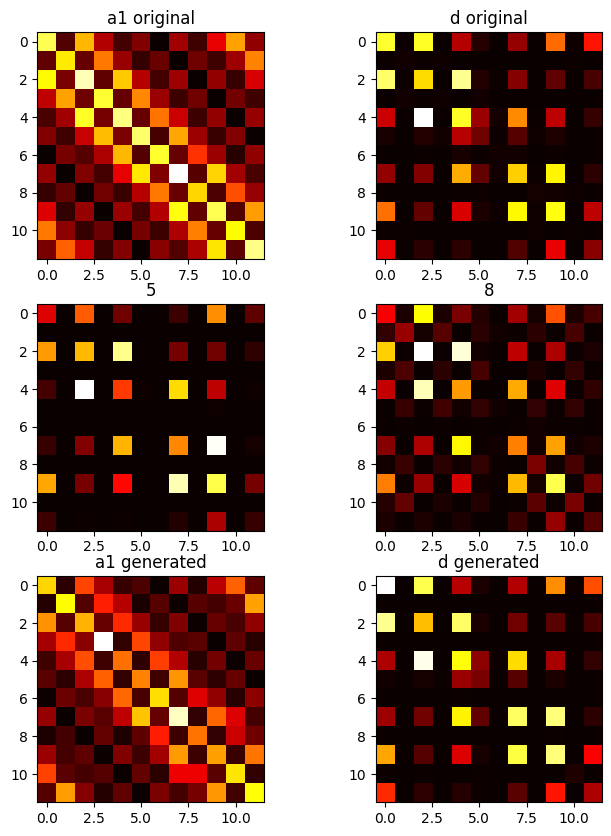

In [12]:
figure, axis = plt.subplots(3, 2)
figure.set_size_inches(8, 10)
  
axis[0, 0].imshow(metric_original_data_df["a1"]["pitch_class_transition_matrix"], cmap='hot', interpolation='nearest')
axis[0, 0].set_title("a1 original")
  
axis[0, 1].imshow(metric_original_data_df["d"]["pitch_class_transition_matrix"], cmap='hot', interpolation='nearest')
axis[0, 1].set_title("d original")
  
axis[1, 0].imshow(metric_df["5_middle_medium_50"]["pitch_class_transition_matrix"], cmap='hot', interpolation='nearest')
axis[1, 0].set_title("5")
  
axis[1, 1].imshow(metric_df["8_long_medium_50"]["pitch_class_transition_matrix"], cmap='hot', interpolation='nearest')
axis[1, 1].set_title("8")

axis[2, 0].imshow(comp_metric_df["a1"]["pitch_class_transition_matrix"], cmap='hot', interpolation='nearest')
axis[2, 0].set_title("a1 generated")
  
axis[2, 1].imshow(comp_metric_df["d"]["pitch_class_transition_matrix"], cmap='hot', interpolation='nearest')
axis[2, 1].set_title("d generated")

#plt.colorbar()
plt.show()

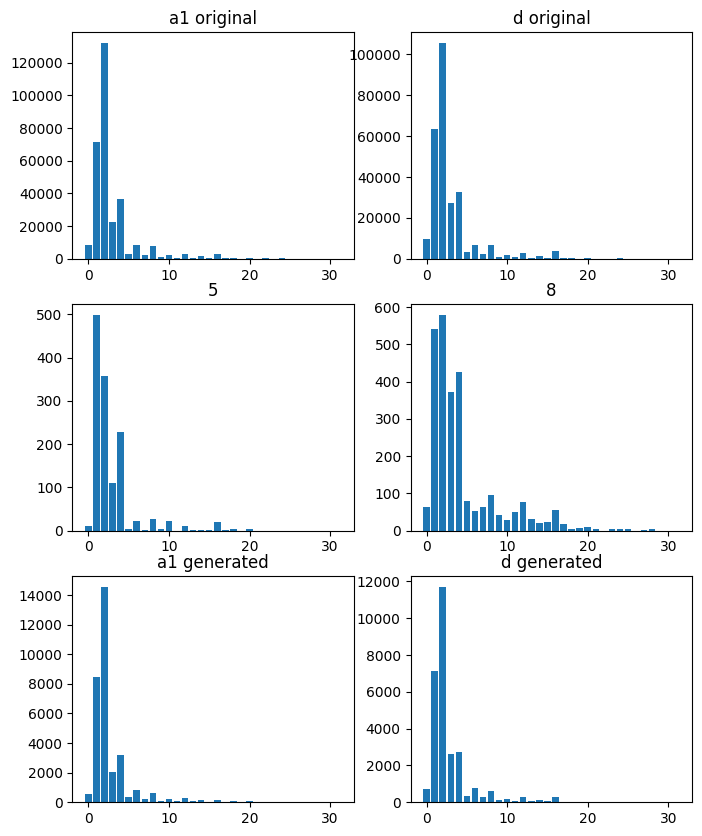

In [13]:
figure, axis = plt.subplots(3, 2)
figure.set_size_inches(8, 10)
  
axis[0, 0].bar(range(32), metric_original_data_df["a1"]["onset_intervals_hist"])
axis[0, 0].set_title("a1 original")
  
axis[0, 1].bar(range(32), metric_original_data_df["d"]["onset_intervals_hist"])
axis[0, 1].set_title("d original")
  
axis[1, 0].bar(range(32), metric_df["5_middle_medium_50"]["onset_intervals_hist"])
axis[1, 0].set_title("5")
  
axis[1, 1].bar(range(32), metric_df["8_long_medium_50"]["onset_intervals_hist"])
axis[1, 1].set_title("8")

axis[2, 0].bar(range(32), comp_metric_df["a1"]["onset_intervals_hist"])
axis[2, 0].set_title("a1 generated")
  
axis[2, 1].bar(range(32), comp_metric_df["d"]["onset_intervals_hist"])
axis[2, 1].set_title("d generated")

plt.show()


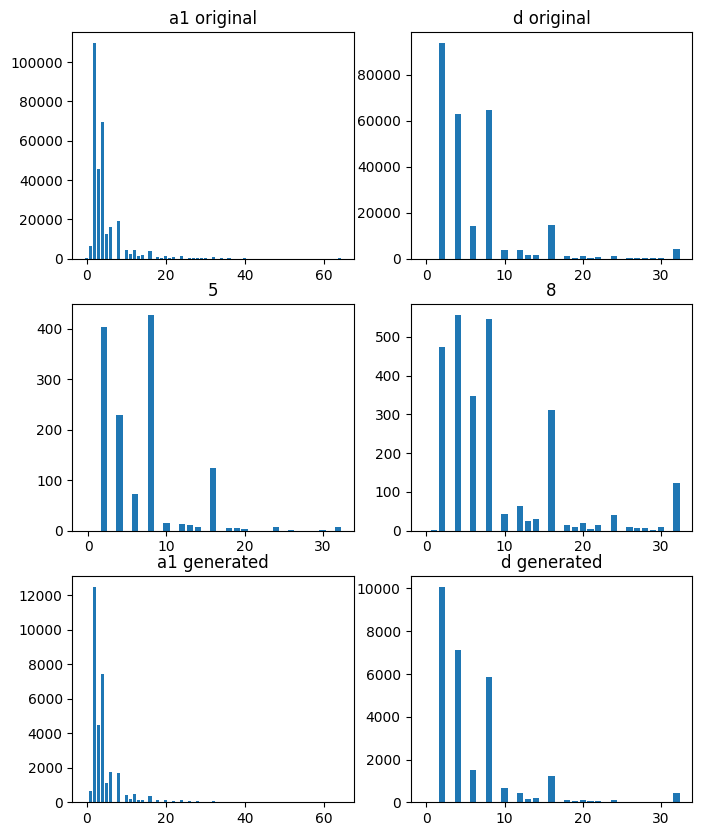

In [14]:
figure, axis = plt.subplots(3, 2)
figure.set_size_inches(8, 10)

axis[0, 0].bar(metric_original_data_df["a1"]["note_length_hist_bins"].keys(), metric_original_data_df["a1"]["note_length_hist_bins"].values())
axis[0, 0].set_title("a1 original")
  
axis[0, 1].bar(metric_original_data_df["d"]["note_length_hist_bins"].keys(), metric_original_data_df["d"]["note_length_hist_bins"].values())
axis[0, 1].set_title("d original")
  
axis[1, 0].bar(metric_df["5_middle_medium_50"]["note_length_hist_bins"].keys(), metric_df["5_middle_medium_50"]["note_length_hist_bins"].values())
axis[1, 0].set_title("5")
  
axis[1, 1].bar(metric_df["8_long_medium_50"]["note_length_hist_bins"].keys(), metric_df["8_long_medium_50"]["note_length_hist_bins"].values())
axis[1, 1].set_title("8")

axis[2, 0].bar(comp_metric_df["a1"]["note_length_hist_bins"].keys(), comp_metric_df["a1"]["note_length_hist_bins"].values())
axis[2, 0].set_title("a1 generated")
  
axis[2, 1].bar(comp_metric_df["d"]["note_length_hist_bins"].keys(), comp_metric_df["d"]["note_length_hist_bins"].values())
axis[2, 1].set_title("d generated")

plt.show()

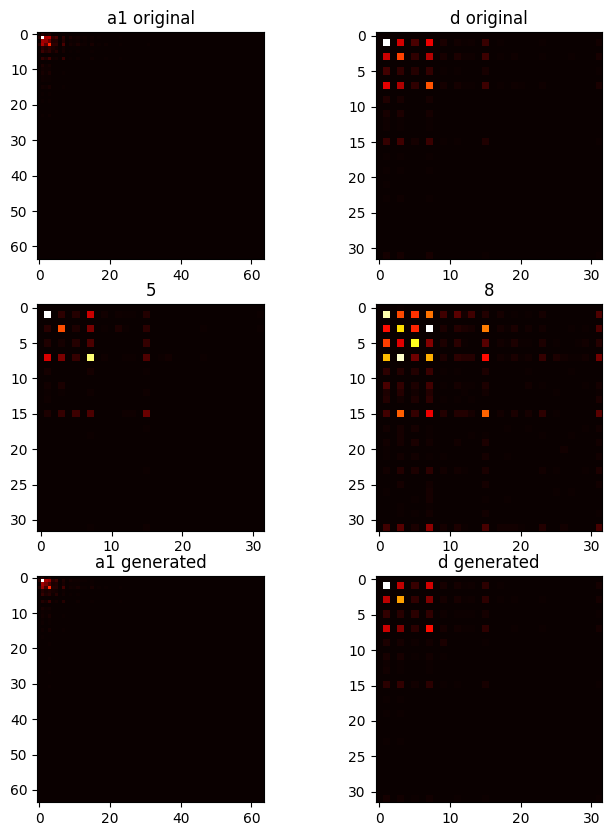

In [15]:
figure, axis = plt.subplots(3, 2)
figure.set_size_inches(8, 10)
  
axis[0, 0].imshow(metric_original_data_df["a1"]["note_length_transition_matrix"], cmap='hot', interpolation='nearest')
axis[0, 0].set_title("a1 original")
  
axis[0, 1].imshow(metric_original_data_df["d"]["note_length_transition_matrix"], cmap='hot', interpolation='nearest')
axis[0, 1].set_title("d original")
  
axis[1, 0].imshow(metric_df["5_middle_medium_50"]["note_length_transition_matrix"], cmap='hot', interpolation='nearest')
axis[1, 0].set_title("5")
  
axis[1, 1].imshow(metric_df["8_long_medium_50"]["note_length_transition_matrix"], cmap='hot', interpolation='nearest')
axis[1, 1].set_title("8")

axis[2, 0].imshow(comp_metric_df["a1"]["note_length_transition_matrix"], cmap='hot', interpolation='nearest')
axis[2, 0].set_title("a1 generated")
  
axis[2, 1].imshow(comp_metric_df["d"]["note_length_transition_matrix"], cmap='hot', interpolation='nearest')
axis[2, 1].set_title("d generated")

#plt.colorbar()
plt.show()